In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('fraud_detection_dataset.csv')
df.head()

,Name,Age,Transaction_ID,Transaction_Time,Amount,Previous_Balance,Current_Balance,Transaction_Frequency_Weekly,Transaction_Type,Device_Type,Is_International,Device_Change,Fraud_Label
0,Adam Crawford,25,38c9fb14-7f90-4e64-83d6-736ec835baaf,2025-06-21 04:53:51,2785.71,17634.36,14848.65,19,Transfer,ATM,1,1,1
1,Paul Montgomery,25,77ec0ae8-dfd6-4433-8445-dc3a0def1dea,2025-05-28 19:41:08,198.07,4186.04,3987.97,19,ATM Withdrawal,ATM,0,0,0
2,Cassandra Mcfarland,33,c08497cb-e112-437a-b6bb-39ada8309ac7,2025-09-18 10:24:31,860.12,45674.22,44814.10,16,Bill Payment,Web,0,1,1
3,Mary White,65,a0fcae51-797d-4ecb-9ba9-2bf23b5e2354,2025-09-12 02:45:32,3189.80,10794.53,7604.73,18,Transfer,Web,0,0,0
4,Eileen Rosales,50,3a1e7828-4d85-432a-a7d8-58e83a43e153,2025-08-01 04:53:00,1703.19,34100.57,32397.38,17,Online Purchase,Web,0,0,0


In [2]:
df['Device_Type'].unique()

array(['ATM', 'Web', 'POS', 'Mobile'], dtype=object)

In [3]:
df['Transaction_Type'].unique()

array(['Transfer', 'ATM Withdrawal', 'Bill Payment', 'Online Purchase'],
      dtype=object)

In [4]:
df['prev_trans_ratio'] = round(df['Amount']/df['Previous_Balance'],2)
df.head()

,Name,Age,Transaction_ID,Transaction_Time,Amount,Previous_Balance,Current_Balance,Transaction_Frequency_Weekly,Transaction_Type,Device_Type,Is_International,Device_Change,Fraud_Label,prev_trans_ratio
0,Adam Crawford,25,38c9fb14-7f90-4e64-83d6-736ec835baaf,2025-06-21 04:53:51,2785.71,17634.36,14848.65,19,Transfer,ATM,1,1,1,0.16
1,Paul Montgomery,25,77ec0ae8-dfd6-4433-8445-dc3a0def1dea,2025-05-28 19:41:08,198.07,4186.04,3987.97,19,ATM Withdrawal,ATM,0,0,0,0.05
2,Cassandra Mcfarland,33,c08497cb-e112-437a-b6bb-39ada8309ac7,2025-09-18 10:24:31,860.12,45674.22,44814.10,16,Bill Payment,Web,0,1,1,0.02
3,Mary White,65,a0fcae51-797d-4ecb-9ba9-2bf23b5e2354,2025-09-12 02:45:32,3189.80,10794.53,7604.73,18,Transfer,Web,0,0,0,0.30
4,Eileen Rosales,50,3a1e7828-4d85-432a-a7d8-58e83a43e153,2025-08-01 04:53:00,1703.19,34100.57,32397.38,17,Online Purchase,Web,0,0,0,0.05


In [5]:
for row in df['Transaction_Frequency_Weekly']:
  if row < 20:
    df['Transaction_Frequency_Weekly'] = 'Normal'
  elif row > 20 and row < 35:
    df['Transaction_Frequency_Weekly'] = 'Medium'
  else:
    df['Transaction_Frequency_Weekly'] = 'High'

df.head()

,Name,Age,Transaction_ID,Transaction_Time,Amount,Previous_Balance,Current_Balance,Transaction_Frequency_Weekly,Transaction_Type,Device_Type,Is_International,Device_Change,Fraud_Label,prev_trans_ratio
0,Adam Crawford,25,38c9fb14-7f90-4e64-83d6-736ec835baaf,2025-06-21 04:53:51,2785.71,17634.36,14848.65,Normal,Transfer,ATM,1,1,1,0.16
1,Paul Montgomery,25,77ec0ae8-dfd6-4433-8445-dc3a0def1dea,2025-05-28 19:41:08,198.07,4186.04,3987.97,Normal,ATM Withdrawal,ATM,0,0,0,0.05
2,Cassandra Mcfarland,33,c08497cb-e112-437a-b6bb-39ada8309ac7,2025-09-18 10:24:31,860.12,45674.22,44814.10,Normal,Bill Payment,Web,0,1,1,0.02
3,Mary White,65,a0fcae51-797d-4ecb-9ba9-2bf23b5e2354,2025-09-12 02:45:32,3189.80,10794.53,7604.73,Normal,Transfer,Web,0,0,0,0.30
4,Eileen Rosales,50,3a1e7828-4d85-432a-a7d8-58e83a43e153,2025-08-01 04:53:00,1703.19,34100.57,32397.38,Normal,Online Purchase,Web,0,0,0,0.05


In [6]:
df.drop(columns=['Name', 'Age', 'Transaction_ID', 'Transaction_Time', 'Fraud_Label'], axis=1, inplace=True)
df.head()

,Amount,Previous_Balance,Current_Balance,Transaction_Frequency_Weekly,Transaction_Type,Device_Type,Is_International,Device_Change,prev_trans_ratio
0,2785.71,17634.36,14848.65,Normal,Transfer,ATM,1,1,0.16
1,198.07,4186.04,3987.97,Normal,ATM Withdrawal,ATM,0,0,0.05
2,860.12,45674.22,44814.10,Normal,Bill Payment,Web,0,1,0.02
3,3189.80,10794.53,7604.73,Normal,Transfer,Web,0,0,0.30
4,1703.19,34100.57,32397.38,Normal,Online Purchase,Web,0,0,0.05


In [8]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = ['Amount', 'Previous_Balance', 'Current_Balance']
cat_features = ['Transaction_Type', 'Device_Type']
ordinal_features = ['Transaction_Frequency_Weekly']

preprocessor = ColumnTransformer(
transformers=[
    ('num', MinMaxScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features),
    ('ord', OrdinalEncoder(categories=[['Normal','Medium','High']]), ordinal_features)
  ],
remainder='passthrough'
)

X = preprocessor.fit_transform(df)

**ISOLATION FOREST**

In [14]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)

iso_forest.fit(X)

df['Anomaly'] = iso_forest.predict(X)

df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})

print(df['Anomaly'].value_counts())

Anomaly
0    9800
1     200
Name: count, dtype: int64


**ONE CLASS SVM**

In [15]:
from sklearn.svm import OneClassSVM

oc_svm = OneClassSVM(nu=0.02, kernel='rbf', gamma='scale')

oc_svm.fit(X)

df['Anomaly_SVM'] = oc_svm.predict(X)

df['Anomaly_SVM'] = df['Anomaly_SVM'].map({1: 0, -1: 1})

print(df['Anomaly_SVM'].value_counts())

Anomaly_SVM
0    9793
1     207
Name: count, dtype: int64


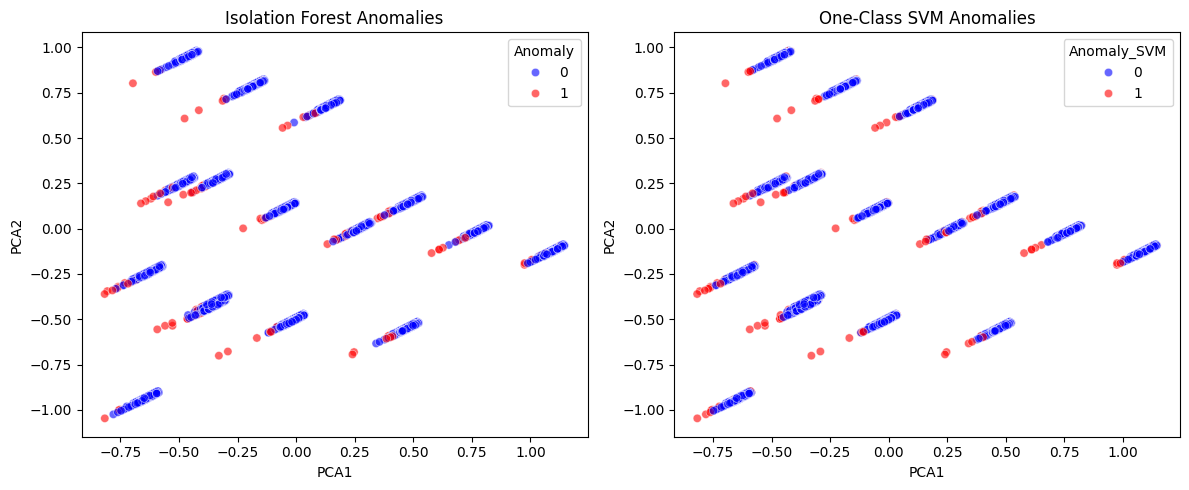

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Anomaly', data=df, palette={0:'blue',1:'red'}, alpha=0.6)
plt.title('Isolation Forest Anomalies')

plt.subplot(1,2,2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Anomaly_SVM', data=df, palette={0:'blue',1:'red'}, alpha=0.6)
plt.title('One-Class SVM Anomalies')

plt.tight_layout()
plt.show()

In [26]:
import pickle

pipeline = Pipeline([('preprocessor', preprocessor), ('isoforest', iso_forest)])

pipeline.fit(df)

pickle_model_path = "model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(pipeline, f)